<a href="https://colab.research.google.com/github/cal546/DSPS_CAdkins/blob/main/hw10/AutoEncoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras import optimizers
from keras.layers import Dense#, Dropout, Flatten
from keras.callbacks import EarlyStopping
#from keras.layers import Conv2D, MaxPooling2D
#from keras import backend as K
#import glob
import pylab as pl
from PIL import Image
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# 1. change kernel to GPU 
go to runtime -> change runtime type -> GPU

### regression
- loss='mean_squared_error' L2: default loss to use for regression problems. => linear activation function in output layer, one node out

alternatives:  loss='mean_squared_logarithmic_error', 'mean_absolute_error' (which is L1 instead of L2)
### binary classification

- loss='binary_crossentropy' => sigmoid activation function in output layer, one node out

alternatives: 'hinge'

### multiclass classification
categorical encoded as numerical
- loss='categorical_crossentropy' => softmax n nodes out

onehot encoded categoridal
- 'parse_categorical_crossentropy' => softmax n nodes out

- 'kullback Leibler Divergence Loss' => probabilistic categorical classification; log(P/Q)

## optimizers
- SGD: stocastic gradient descent 
    - nesterov=True -> momentum inclusion
- adam: Adaptive moment estimation. **good in most cases**
- adagrad: different steps for different parameters based on frequency (binary input) well-suited for dealing with sparse data.

- adaDelta: like adagrad but compensated for vanishing learning rate problem

momentum refers to looking one step back and make a decision that includes the slope there

### parameter:
generally you need to adjust the learning rate which is how much you change the parameters by at each step. 
keras.optimizers.Adam(lr=0.001)


https://gitcdn.xyz/cdn/Tony607/blog_statics/e1a0b1e060e783bd1978a141acff897ae71bd021/images/optimizer/optimizer.gif

11501568/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)

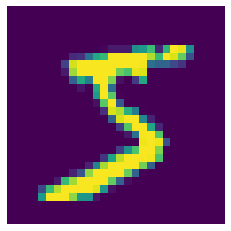

In [ ]:
(x_train, l_train), (x_test, l_test) = mnist.load_data()

y_train = np.array([np.zeros(10) for i in range(len(x_train))])
y_test = np.array([np.zeros(10) for i in range(len(x_test))])
for i in range(len(l_train)):
  y_train[i][l_train[i]] = 1
for i in range(len(l_test)):
  y_test[i][l_test[i]] = 1

img_rows, img_cols = 28, 28
pl.imshow(x_train[0])
pl.axis('off')
intialshape = x_train[0].shape
ndim = np.prod(x_train[0].shape)
x_train.shape

In [ ]:
y_train[2]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])

In [ ]:
x_train = (x_train.astype(float) / 255).reshape(len(x_train), ndim)
x_test = (x_test.astype(float) / 255).reshape(len(x_test), ndim)
x_train.shape, x_test.shape
xshape = x_train.shape[1]

In [ ]:
myCallback = EarlyStopping(monitor='val_loss', patience=5, min_delta=0.0001)

In [ ]:
numberGuesser = Sequential()
## encoder
# input layer and the output size
numberGuesser.add(Dense(128, activation='relu', input_dim=xshape))
numberGuesser.add(Dense(64, activation='relu'))
numberGuesser.add(Dense(32, activation='relu'))
#bottle neck
numberGuesser.add(Dense(16, activation='relu'))
numberGuesser.add(Dense(10, activation='sigmoid'))

In [ ]:
numberGuesser.compile(optimizer="adadelta", loss = "binary_crossentropy")

In [ ]:
numberGuesser.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 128)               100480    
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 16)                528       
                                                                 
 dense_9 (Dense)             (None, 10)                170       
                                                                 
Total params: 111,514
Trainable params: 111,514
Non-trainable params: 0
_________________________________________________________________


In [ ]:
numberFitter = numberGuesser.fit(x_train, y_train, validation_data=(x_test, y_test), epochs = 2000, batch_size=100, verbose =1, callbacks= [myCallback])

Epoch 1/2000
600/600 [==============================] - 3s 5ms/step - loss: 0.6891 - val_loss: 0.6838
Epoch 2/2000
600/600 [==============================] - 3s 5ms/step - loss: 0.6784 - val_loss: 0.6721
Epoch 3/2000
600/600 [==============================] - 3s 5ms/step - loss: 0.6660 - val_loss: 0.6581
Epoch 4/2000
600/600 [==============================] - 3s 5ms/step - loss: 0.6498 - val_loss: 0.6387
Epoch 5/2000
600/600 [==============================] - 3s 5ms/step - loss: 0.6267 - val_loss: 0.6107
Epoch 6/2000
600/600 [==============================] - 3s 4ms/step - loss: 0.5929 - val_loss: 0.5698
Epoch 7/2000
600/600 [==============================] - 3s 4ms/step - loss: 0.5466 - val_loss: 0.5181
Epoch 8/2000
600/600 [==============================] - 3s 5ms/step - loss: 0.4928 - val_loss: 0.4627
Epoch 9/2000
600/600 [==============================] - 3s 5ms/step - loss: 0.4386 - val_loss: 0.4112
Epoch 10/2000
600/600 [==============================] - 3s 5ms/step - loss: 0.393

In [ ]:
output = numberGuesser.predict(x_test)

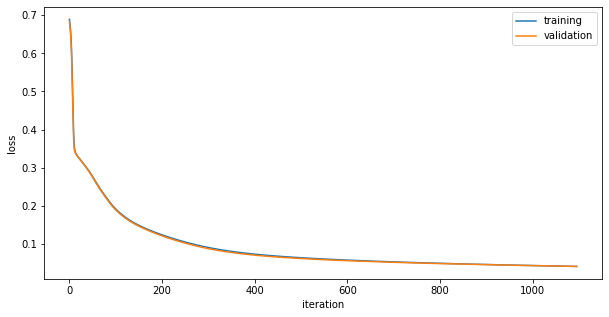

In [ ]:
pl.plot(np.array(numberFitter.history['loss']), label="training")
pl.plot(np.array(numberFitter.history['val_loss']), label="validation")
pl.ylabel('loss')
pl.xlabel('iteration')
pl.legend()
#pl.yscale('log')
#pl.xscale('log')

In [ ]:
output[2]

array([2.1512322e-07, 9.8094821e-01, 3.3094941e-03, 2.8305869e-03,
       2.4105543e-03, 6.5003056e-05, 9.1299030e-04, 8.7106545e-03,
       2.7309963e-03, 3.4152321e-04], dtype=float32)

In [ ]:
def compareLabelandPred(i, testimg, real, pred):
  #print("Real #: ", real[i], "\tPredicted #: ", pred)
  val = real[i] - pred
  if(val != 0):
    print("We guessed:", pred, "but it was really ", real[i])
    #fig = pl.figure(figsize(10,5))
    #ax = fig.add_subplot(111)
    #ax.imshow(testimg[i].reshape((28,28)), cmap="bone")
    #ax.text(1.2, 1.2, "Predicted Number: " + str(pred) + "  Real Number: " + str(real[i]), bbox={'facecolor': 'white', 'pad': 10})
  return 1 if val == 0 else 0

In [ ]:
def compareinandnum(i, testimg, predictedNum, initialshape=(28,28)):
  fig = pl.figure(figsize(10,5))
  ax = fig.add_subplot(111) 
  ax.imshow(testimg[i].reshape(initialshape) , cmap="bone")
  #ax.get_xaxis().set_visible(False)
  #ax.get_yaxis().set_visible(False)
  #ax.label = "Predicted Number: " + str(predictedNum)
  print("Predicted Number: ", predictedNum)
  #ax.legend()


In [ ]:
np.max(output)

0.41956878

In [ ]:
argmax(output[1])

2

In [ ]:
numRight = 0
n = 10000
for i in range(n):
  ret = compareLabelandPred(i, x_test, l_test, argmax(output[i]))
  numRight = numRight + ret
print("We got ", numRight, " out of ", n)
percCorrect = float(numRight) / n

We guessed: 6 but it was really  5
We guessed: 6 but it was really  4
We guessed: 5 but it was really  3
We guessed: 4 but it was really  9
We guessed: 4 but it was really  7
We guessed: 8 but it was really  2
We guessed: 8 but it was really  9
We guessed: 4 but it was really  9
We guessed: 8 but it was really  3
We guessed: 5 but it was really  6
We guessed: 7 but it was really  8
We guessed: 8 but it was really  9
We guessed: 5 but it was really  3
We guessed: 2 but it was really  4
We guessed: 0 but it was really  6
We guessed: 1 but it was really  4
We guessed: 5 but it was really  3
We guessed: 7 but it was really  9
We guessed: 7 but it was really  2
We guessed: 3 but it was really  5
We guessed: 0 but it was really  5
We guessed: 7 but it was really  2
We guessed: 7 but it was really  3
We guessed: 7 but it was really  8
We guessed: 8 but it was really  2
We guessed: 0 but it was really  6
We guessed: 8 but it was really  9
We guessed: 8 but it was really  5
We guessed: 3 but it

In [ ]:
print(percCorrect)

0.936


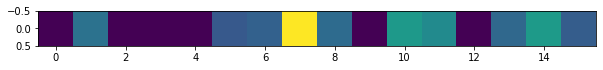

In [ ]:
from keras import backend as K
# input placeholder
inp = model_digits.input                   
# extract the bottle neck outputs
outputs = model_digits.layers[3].output     
# create a function to evaluate the output of the bottle neck layer for a given input
functors = K.function([inp], [outputs])    

# Testing
layer_outs = functors(x_test[:1])
pl.imshow(layer_outs[0]);